In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as decompose
import numpy as np
from statsmodels.tsa.stattools import adfuller as df

C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\juanh\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Ej 1

In [2]:
dataFrame = pd.read_excel("all-euro-data-2020-2021.xlsx", sheet_name = 'E0')

In [3]:
df2 = dataFrame[['Date', 'FTHG', 'FTAG', 'HTHG', 'HTAG']] 

In [4]:
df2.head()

Date  FTHG  FTAG  HTHG  HTAG
0 2020-09-12     0     3     0     1
1 2020-09-12     1     0     1     0
2 2020-09-12     4     3     3     2
3 2020-09-12     0     2     0     0
4 2020-09-13     0     3     0     0

In [5]:
df2.Date=pd.to_datetime(df2.Date)

C:\Users\juanh\Anaconda3\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
df2.head()

Date  FTHG  FTAG  HTHG  HTAG
0 2020-09-12     0     3     0     1
1 2020-09-12     1     0     1     0
2 2020-09-12     4     3     3     2
3 2020-09-12     0     2     0     0
4 2020-09-13     0     3     0     0

## Ej 2

In [9]:
aux = df2.groupby(by = 'Date').mean()
aux.head()

FTHG  FTAG  HTHG  HTAG
Date                              
2020-09-12  1.25  2.00  1.00  0.75
2020-09-13  0.00  2.00  0.00  0.00
2020-09-14  0.50  2.50  0.00  1.50
2020-09-19  3.00  2.25  1.25  1.00
2020-09-20  1.50  3.00  0.50  1.00

In [11]:
serie = pd.Series(aux['FTHG'])
print(type(serie))

<class 'pandas.core.series.Series'>


## Ej 3

In [12]:
window = 7

def trend_season_resid(serie):
    global window
    result=decompose(serie,freq=window)
    trend=result.trend
    season=result.seasonal
    residuo=result.resid
    
    #Eliminamos lo NaN
    trend = trend.dropna()
    season = season.dropna()
    residuo = residuo.dropna()
    
    plt.figure(figsize=(20,20))
    plt.subplot(311)
    plt.plot(trend)
    plt.subplot(312)
    plt.plot(season)
    plt.subplot(313)
    plt.plot(residuo)
    
      
    return [trend, season, residuo]

## Ej 4

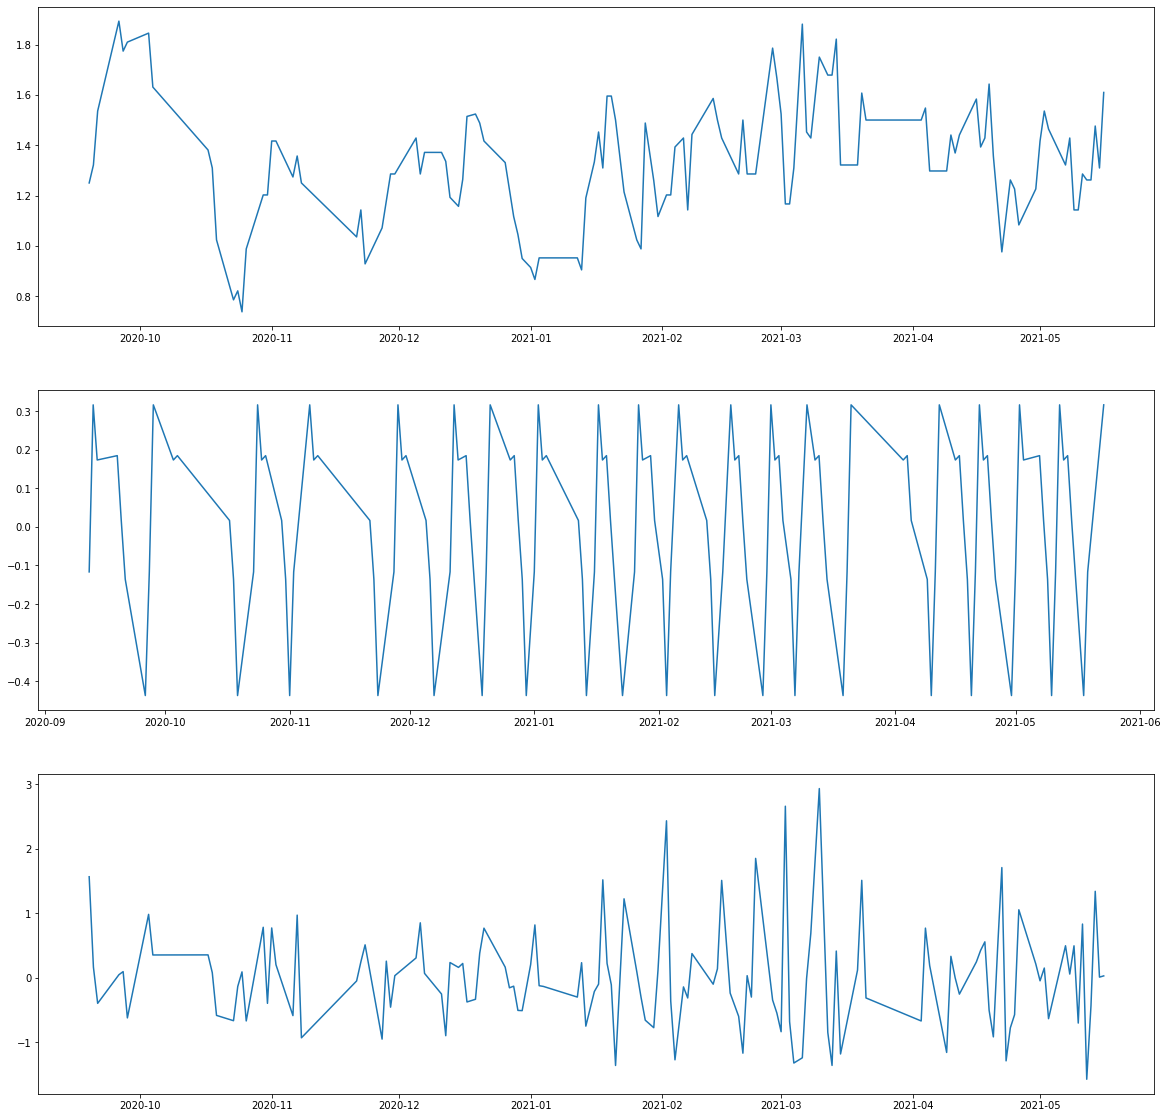

In [14]:
resultado = trend_season_resid(serie) 

## Ej 5

**JUAN: En realidad no había que trozear la serie y calcular el test df en cada tramo sino aplicar el test una sola vez al residuo total**

Tramo 0
(-3.364072774569775, 0.01224632773055798, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 5.533434639057862)

Estadístico -3.364072774569775
P-value 0.01224632773055798
Valores críticos {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Tramo 1
(-3.0417175222894004, 0.031177934941325376, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 1.9527673596647368)

Estadístico -3.0417175222894004
P-value 0.031177934941325376
Valores críticos {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

Tramo 2
(-2.893751919145228, 0.04607940349013459, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 8.656966514654384)

Estadístico -2.893751919145228
P-value 0.04607940349013459
Valores críticos {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

Tramo 3
(-3.5873677239141304, 0.006007173127396931, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.9

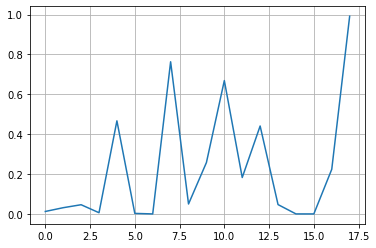

Tramos con p-valor mayor que 0.05: 8
Tramos con p-valor menor que 0.05: 10


In [15]:
residuos = resultado[2]

def test_df(residuos):
    global mayores, menores
    n_tramos=int(round(len(residuos)/window,0)) #Número de tramos

    pvalues=[]
    
    mayores = 0
    menores = 0

    for cont in range(0,n_tramos): 
        print('Tramo',cont)
        ts_temp=residuos[cont*window:(cont+1)*window]
        result=df(ts_temp,autolag='AIC')
        print(result)
        print()
        print('Estadístico',result[0])
        pvalues.append(result[1])
        if result[1]>0.05:
            mayores += 1
        else:
            menores += 1
        print('P-value',result[1])
        print('Valores críticos',result[4])
        print()
    plt.plot(pvalues)
    plt.grid()
    plt.show()
    
    print('Tramos con p-valor mayor que 0.05:', mayores)
    print('Tramos con p-valor menor que 0.05:', menores)
    
test_df(residuos)

#### Para aceptar la hipótesis nula (serie no estacionaria) el estadístico (primer valor del resultado) ha de ser mayor que los valores críticos.

#### Otro criterio para acepatar la hipótesis nula es que el p-value sea mayor que 0.05 (95% de confianza).

Es decir, se rechaza que la serie de los residuos sea no estacionaria. La mayoría de los p-valores de los tramos son menores que 0.05.

### Ej 6

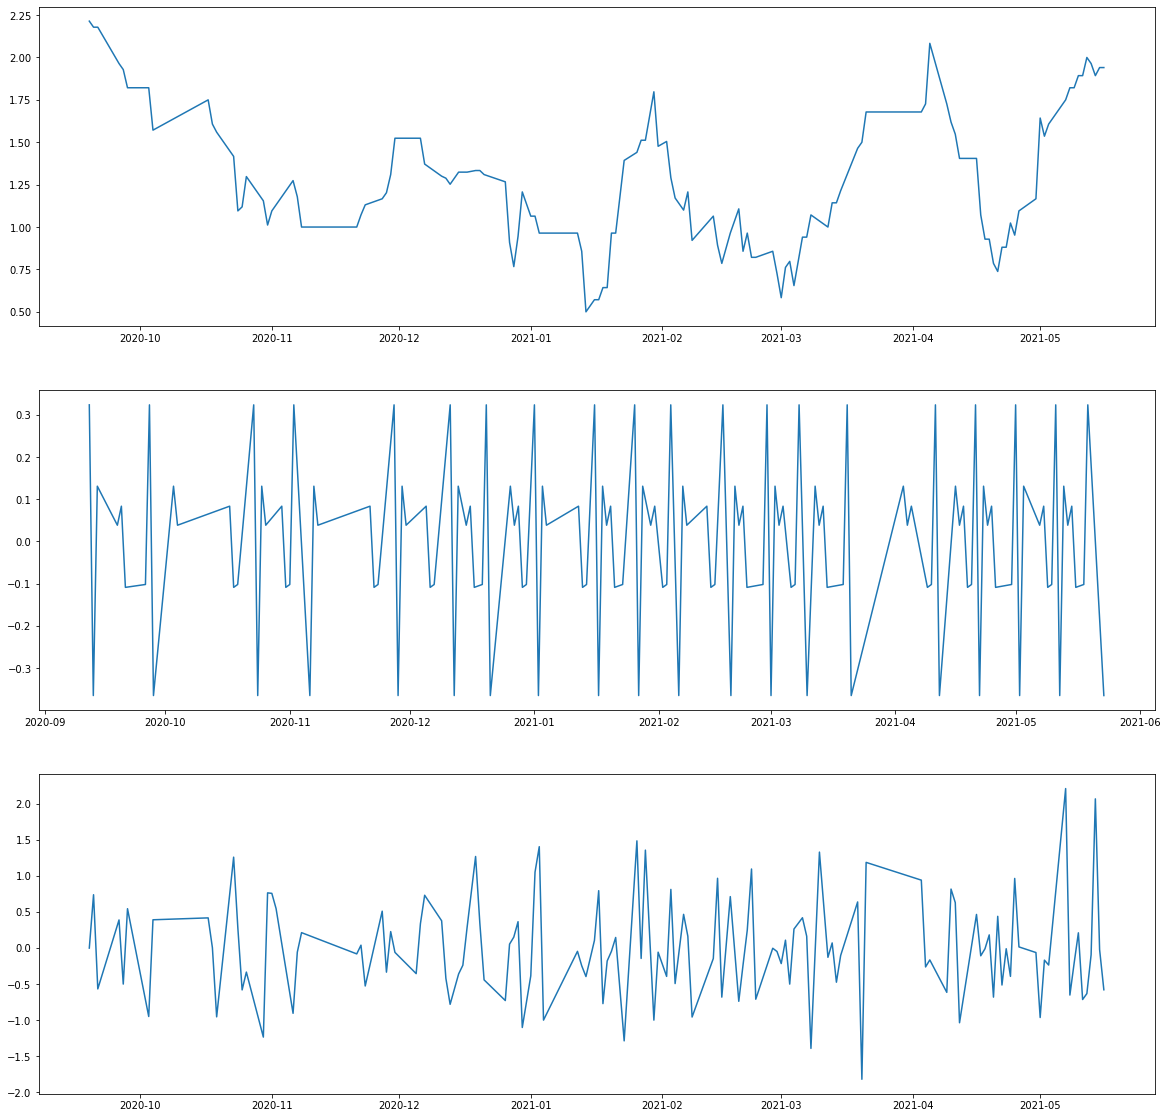

In [16]:
FTAG = pd.Series(aux['FTAG'])
resultado2 = trend_season_resid(FTAG) 

Tramo 0
(-5.761744029456875, 5.651429453337494e-07, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 1.9431077345717611)

Estadístico -5.761744029456875
P-value 5.651429453337494e-07
Valores críticos {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Tramo 1
(-2.968611825656018, 0.037931459050619544, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 12.767870687173211)

Estadístico -2.968611825656018
P-value 0.037931459050619544
Valores críticos {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

Tramo 2
(-2.780117196979954, 0.06117049188467794, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 12.86688033460054)

Estadístico -2.780117196979954
P-value 0.06117049188467794
Valores críticos {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

Tramo 3
(-6.000636156374873, 1.660626864911098e-07, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -

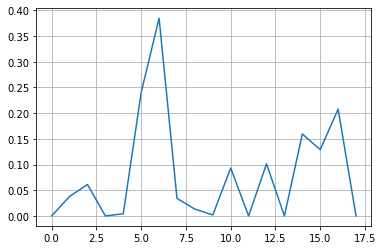

Tramos con p-valor mayor que 0.05: 8
Tramos con p-valor menor que 0.05: 10


In [17]:
residuos = resultado2[2]

test_df(residuos)

Al igual que en el caso anterior, se rechaza que la serie de los residuos sea no estacionaria. La mayoría de los p-valores de los tramos son menores que 0.05.

### Ej 7

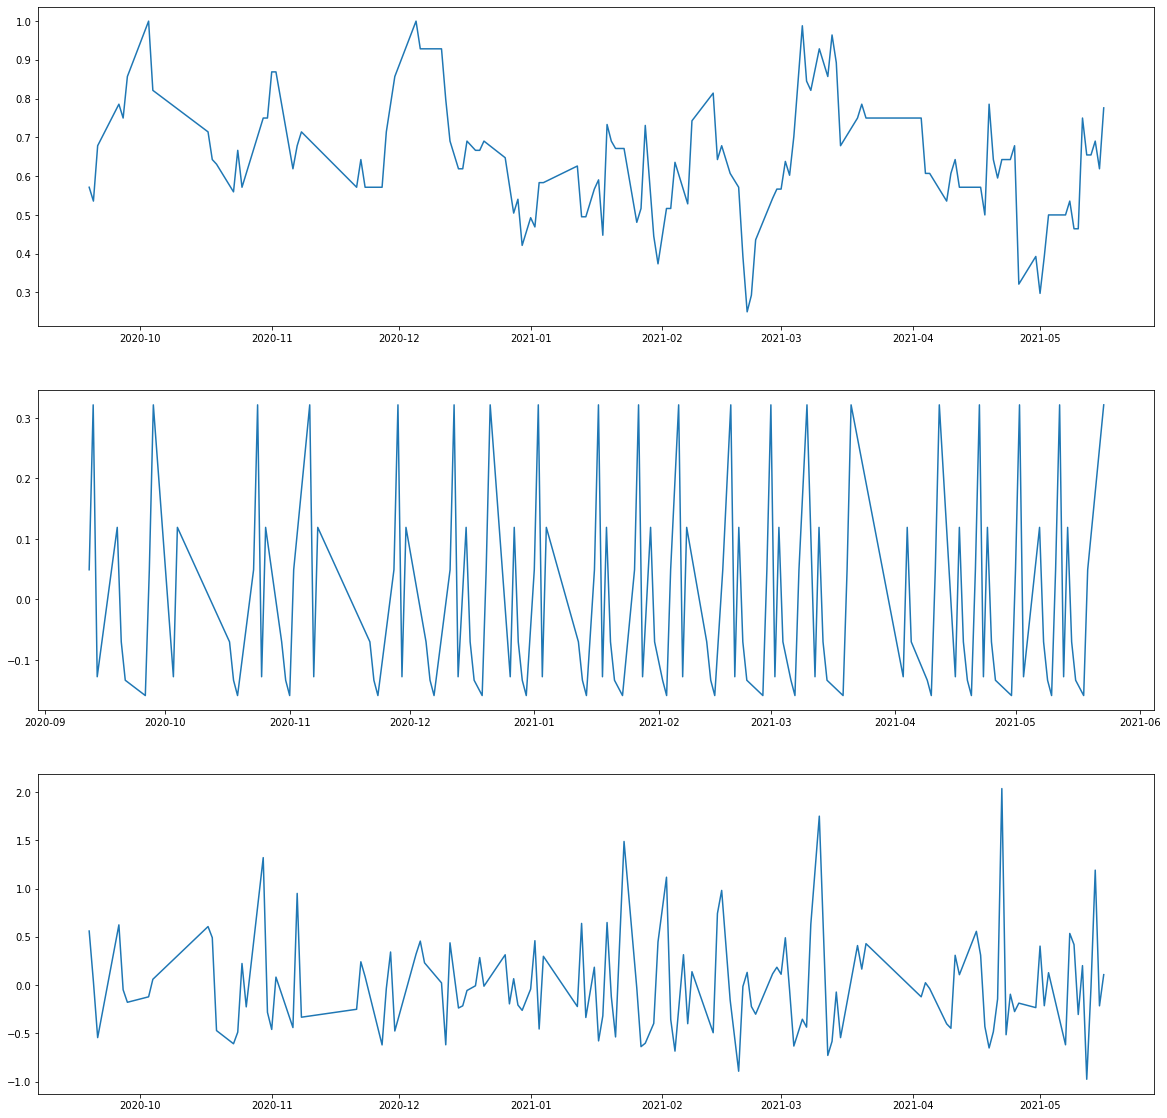

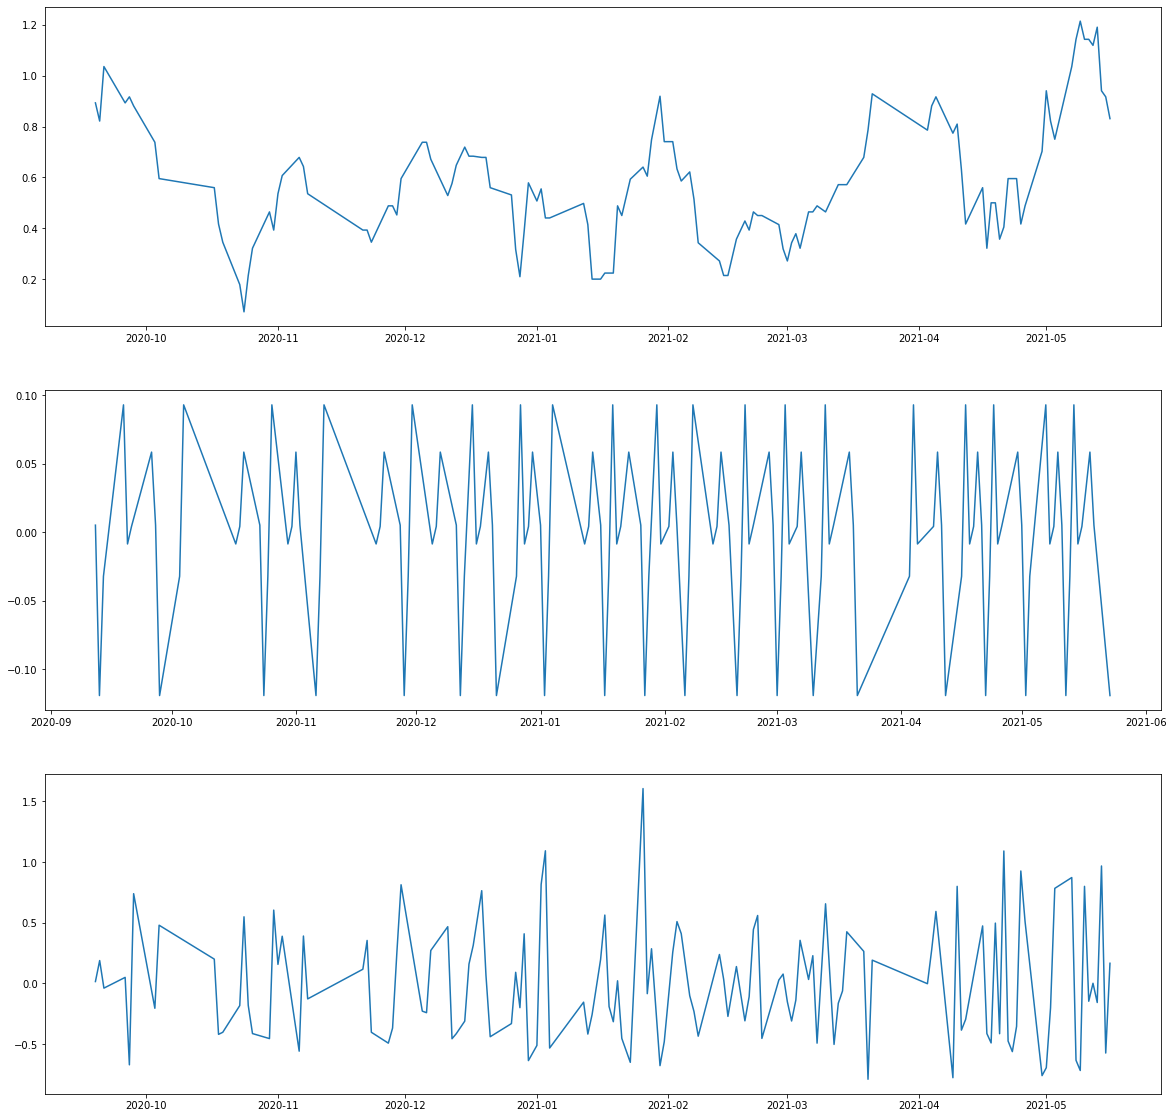

In [18]:
HTHG = pd.Series(aux['HTHG'])
resultado3 = trend_season_resid(HTHG) 
HTAG = pd.Series(aux['HTAG'])
resultado4 = trend_season_resid(HTAG) 

Tramo 0
(-3.8156499931945493, 0.0027511930089715603, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 4.071457479317488)

Estadístico -3.8156499931945493
P-value 0.0027511930089715603
Valores críticos {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

Tramo 1
(-2.7788641568447785, 0.061356873502278655, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 5.9712231262404)

Estadístico -2.7788641568447785
P-value 0.061356873502278655
Valores críticos {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

Tramo 2
(-2.808746331612199, 0.057035237187103946, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 10.843226847094693)

Estadístico -2.808746331612199
P-value 0.057035237187103946
Valores críticos {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Tramo 3
(-7.160643164709419, 2.974366807228949e-10, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.9868

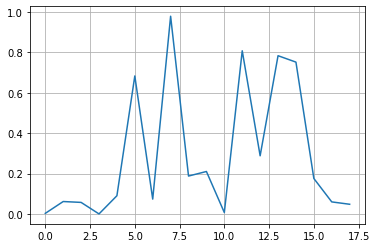

Tramos con p-valor mayor que 0.05: 14
Tramos con p-valor menor que 0.05: 4


In [20]:
#Caso HTHG
residuos = resultado3[2]

test_df(residuos)

Para el caso de los residuos de la variable HTHG la mayoria de los tramos tiene unp-valor superior a 0.05. Por lo tanto aceptamos que la serie no es estacionaria.

Tramo 0
(-4.331239183726589, 0.0003920186299048964, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 7.438323690879496)

Estadístico -4.331239183726589
P-value 0.0003920186299048964
Valores críticos {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Tramo 1
(-2.6409096856304624, 0.08483334663311326, 1, 5, {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}, 6.43472987092748)

Estadístico -2.6409096856304624
P-value 0.08483334663311326
Valores críticos {'1%': -6.045114, '5%': -3.9292800000000003, '10%': -2.98681}

Tramo 2
(-2.732844783519982, 0.06852508326525523, 0, 6, {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}, 6.599675749214644)

Estadístico -2.732844783519982
P-value 0.06852508326525523
Valores críticos {'1%': -5.354256481481482, '5%': -3.6462381481481483, '10%': -2.901197777777778}

Tramo 3
(-1.8974122105464895, 0.3332794661802493, 1, 5, {'1%': -6.045114, '5%': -3.92

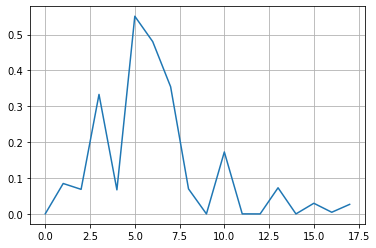

Tramos con p-valor mayor que 0.05: 10
Tramos con p-valor menor que 0.05: 8


In [21]:
#Caso HTAG
residuos = resultado4[2]

test_df(residuos)

Para el caso de los residuos de la variable HTAG la mayoria de los tramos tiene un p-valor superior a 0.05 aunque no con tanta claridad como en el caso anterior. No obstante aceptamos que la serie no es estacionaria.

**JUAN: El hecho de haber troceado el residuo conduce a un resultado incorrecto en este caso. Si hacéis el test a las dos series temporales (sin trocear) a final de primer tiempo obtenéis que ambas series son también estacionarias, aunque no son tan estacionarias como sus equivalentes al final del partido**

### Ej 8

#### Pregunta 1
A partir de los valores del ejercicio 7 podemos concluir que los resultados son más estacionarios al final del partido.

#### Pregunta 2
Es más estacionario al final del partido porque la primera parte siempre es más imprevisible y la segunda se juega como consecuencia de la primera y tiende a la estacionariedad.

#### Pregunta 3
Podemos esperar muchos mejores resultados al final del partido porque un modelo ARIMA requiere de series estacionarias.

#### Pregunta 4
Si quisiéramos entrenar un modelo ARIMA lo haríamos sobre los residuos de la Serie. Por se la serie estacionaria solo tiene sentido entrenar por los residuos ya que la serie no tiene tendencia ni estacionalidad.

#### Pregunta 5
En los momentos en los que los residuos son estacionarios o podamos obtener una serie con los residuos estacionarios vamos a ser capaces de hacer un buen modelo de predicción  y podremos obtener buenos resultados en las apuestas.